<a href="https://colab.research.google.com/github/Rohanjos97/machine-learning-assignments/blob/main/Assignment%203/%20Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Generate 100 real number for the variable X from the uniform distribution U [0, 1].

# 2. Construct the training set T = { ($x_1$,$y_1$), ($x_2$,$y_2$), ... , ($x_{100}$,$y_{100}$)} using the relation

# $Y_i$ = sin(2 π $x_i$) + $ε_i$ where $ε_i$ ~ N(0,0.25).

# In the similar way construct a testing set of size 50 Test = { ($x'_1$,$y'_1$),($x'_2$,$y'_2$),......,($x'_{50}$,$y'_{50}$)}.

Text(0.5, 1.0, 'Testing Data')

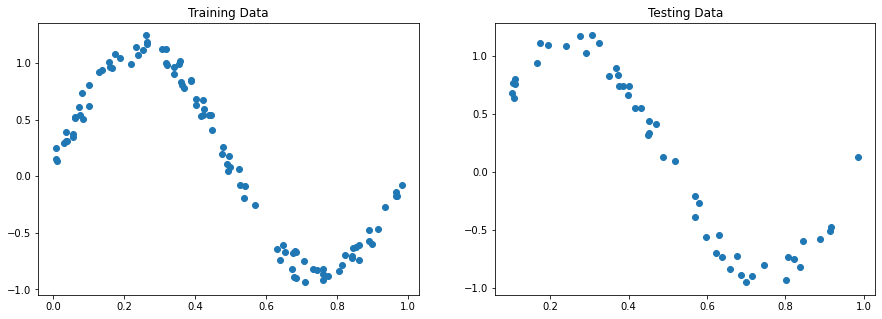

In [1]:
import pandas as pd
import random as random
import numpy as np
import math
import matplotlib.pyplot as plt


# Train data

# Uniform distribution of training data
X_train = np.random.uniform(0, 1, 100)

Y_train = []
for xval in X_train:
  res = math.sin(2 * math.pi * xval) + np.random.uniform(0, 0.25)
  Y_train.append(res)



# Test data

# Uniform distribution of testing data
X_test = np.random.uniform(0, 1, 50)

Y_test = []
for xval in X_test:
  res = math.sin(2 * math.pi * xval) + np.random.uniform(0, 0.25)
  Y_test.append(res)


# Plotting the graph of train and test data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X_train, Y_train)
ax[0].set_title('Training Data')
ax[1].scatter(X_test, Y_test)
ax[1].set_title('Testing Data')

# 3. Estimate the regularized Least Squares Polynomial Regression model of order M= 9, using the training set T using direct method. You also need to tune the regularization parameter λ which corresponds to minimum RMSE. After tuning the parameter λ, evaluate your estimated function using NMSE, RMSE, MAE and R2 on test set.

## NOTE: Tuning for λ = 0.1, 0.05, $2^{-7}$, 0.0002 values.

In [2]:
# Least Square Polynomial Regression
def regularized_LSPR(x_dataset, y_dataset, degree, Lambda):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  lam_I = np.identity(degree+1)*Lambda
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X = np.add(X_Trans_X, lam_I)
  X_Trans_X_Inv = X_Trans_X.I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset)

reg_LSP_ord_9 = np.array(regularized_LSPR(X_train, Y_train, 9, 0))
reg_LSP_ord_9_1 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.1))
reg_LSP_ord_9_05 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.05))
reg_LSP_ord_9_27 = np.array(regularized_LSPR(X_train, Y_train, 9, math.pow(2, -7)))
reg_LSP_ord_9_0002 = np.array(regularized_LSPR(X_train, Y_train, 9, 0.0002))

print(f'coefficient value with regularization and λ = 0: {reg_LSP_ord_9_1}')
print(f'coefficient value with regularization and λ = 1: {reg_LSP_ord_9_05}')
print(f'coefficient value with regularization and λ = 2^-7: {reg_LSP_ord_9_27}')
print(f'coefficient value with regularization and λ = 2^-7: {reg_LSP_ord_9_0002}')

coefficient value with regularization and λ = 0: [[ 0.63007222  1.55269113 -3.36093119 -2.48479948 -0.81370818  0.39731542
   1.0464673   1.27522654  1.23406013  1.03586565]]
coefficient value with regularization and λ = 1: [[ 0.53779002  2.46858513 -4.6993385  -3.02338635 -0.50049302  1.06295261
   1.64970824  1.56530545  1.08757048  0.41127911]]
coefficient value with regularization and λ = 2^-7: [[  0.2661673    5.71828293 -10.69485041  -4.5939959    1.89990513
    4.70774715   4.48769259   2.46639561  -0.42119286  -3.58590851]]
coefficient value with regularization and λ = 2^-7: [[  0.02785476   8.93957474 -17.43093817  -6.39625041   7.0436733
    9.6986373    5.61671777   0.16636202  -3.5190916   -4.2597275 ]]


Text(0.5, 1.0, 'Polynomial Regression for Testing Set')

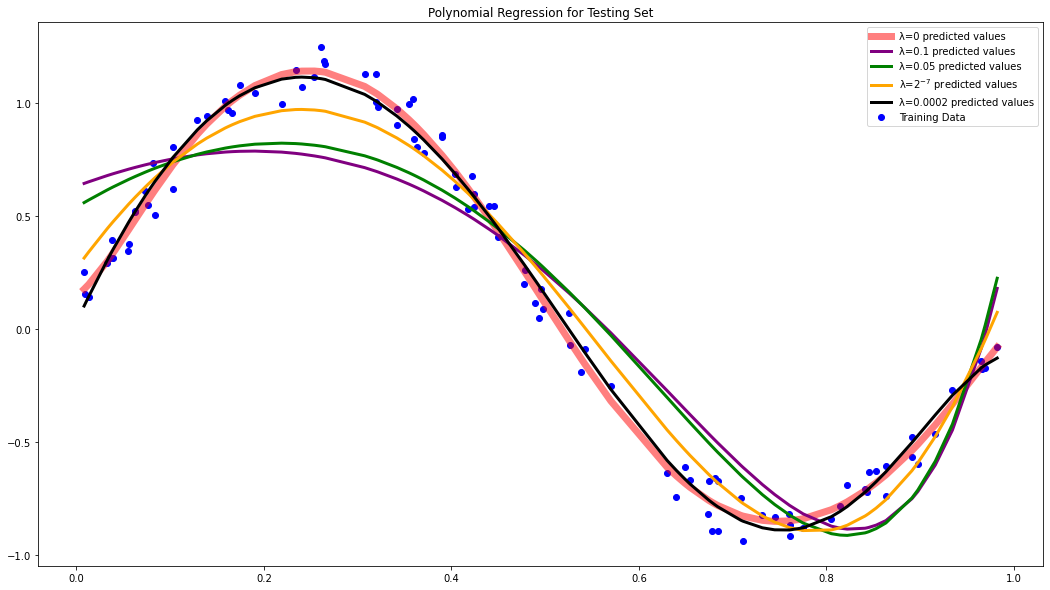

In [3]:
y_predicted_m9, y_predicted_m9_1, y_predicted_m9_05, y_predicted_m9_27, y_predicted_m9_0002 = [], [], [], [], []
X = X_train

for val in X:
  y_val = 0
  y1_val = 0
  y05_val = 0
  y27_val = 0
  y0002val = 0
  for deg in range(9, -1, -1):
    y_val += reg_LSP_ord_9[0][deg] * math.pow(val, deg)
    y1_val += reg_LSP_ord_9_1[0][deg] * math.pow(val, deg)
    y05_val += reg_LSP_ord_9_05[0][deg] * math.pow(val, deg)
    y27_val += reg_LSP_ord_9_27[0][deg] * math.pow(val, deg)
    y0002val += reg_LSP_ord_9_0002[0][deg] * math.pow(val, deg)
  y_predicted_m9.append(y_val)
  y_predicted_m9_1.append(y1_val)
  y_predicted_m9_05.append(y05_val)
  y_predicted_m9_27.append(y27_val)
  y_predicted_m9_0002.append(y0002val)

# Sorting the data to plot line graph
df_predicted_m9 = pd.DataFrame(data=(X, y_predicted_m9),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_1 = pd.DataFrame(data=(X, y_predicted_m9_1),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_05 = pd.DataFrame(data=(X, y_predicted_m9_05),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_27 = pd.DataFrame(data=(X, y_predicted_m9_27),index=['X', 'Y_predicted']).T.sort_values(by='X')
df_predicted_m9_0002 = pd.DataFrame(data=(X, y_predicted_m9_0002),index=['X', 'Y_predicted']).T.sort_values(by='X')


# Plotting all the points to compare the regression graph

fig, axes = plt.subplots(1, 1, figsize=(18, 10))
axes.scatter(X_train, Y_train, color='blue')
axes.plot(df_predicted_m9['X'], df_predicted_m9['Y_predicted'], color='red', linewidth=7, alpha=0.5)
axes.plot(df_predicted_m9_1['X'], df_predicted_m9_1['Y_predicted'], color='purple', linewidth=3)
axes.plot(df_predicted_m9_05['X'], df_predicted_m9_05['Y_predicted'], color='green', linewidth=3)
axes.plot(df_predicted_m9_27['X'], df_predicted_m9_27['Y_predicted'], color='orange', linewidth=3)
axes.plot(df_predicted_m9_0002['X'], df_predicted_m9_0002['Y_predicted'], color='black', linewidth=3)
axes.legend(['λ=0 predicted values', 'λ=0.1 predicted values', 'λ=0.05 predicted values', 'λ=$2^{-7}$ predicted values', 'λ=0.0002 predicted values', 'Training Data'])
axes.set_title('Polynomial Regression for Testing Set')

## NMSE (Normalized Mean Square Error)

In [4]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_train),index=['y predicted m9 λ1','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ1'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ1'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ1'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ1 = 0

rmse_m9_λ1 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ1

0.22681337385487446

In [5]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_train),index=['y predicted m9 λ05','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ05'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ05'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ05'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ05 = 0

rmse_m9_λ05 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ05

0.2227782393975875

In [6]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ2^-7','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ2^-7'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ2^-7'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ2^-7'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ1 = 0

rmse_m9_λ1 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ1

0.21144512087835146

In [7]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_train),index=['y predicted m9 λ0002','Y_train']).T

# Normalizing the dataset
max_pred = y_vs_y_hat_m9['y predicted m9 λ0002'].max()
max_train = y_vs_y_hat_m9['Y_train'].max()

min_pred = y_vs_y_hat_m9['y predicted m9 λ0002'].min()
min_train = y_vs_y_hat_m9['Y_train'].min()

normalized_y_pred = (y_vs_y_hat_m9['y predicted m9 λ0002'] - min_pred)/(max_pred - min_pred)
normalized_y_train = (y_vs_y_hat_m9['Y_train'] - min_train)/(max_train - min_train)

normalized_square_error = (normalized_y_pred - normalized_y_train)**2

nmse_m9_λ0002 = 0

rmse_m9_λ0002 = normalized_square_error.sum() / len(normalized_square_error)
rmse_m9_λ0002

0.20624919435554978

## RMSE (Root Mean Square error)

In [8]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_test),index=['y predicted m9 λ1','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ1'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ1 = 0

rmse_m9_λ1 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ1 = math.sqrt(rmse_m9_λ1)
rmse_m9_λ1

0.6540562895142794

In [9]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_test),index=['y predicted m9 λ05','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ05'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ05 = 0

rmse_m9_λ05 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ05 = math.sqrt(rmse_m9_λ05)
rmse_m9_λ05

0.6574214496175711

In [10]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_test),index=['y predicted m9 λ2^-7','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ2^-7'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ27 = 0

rmse_m9_λ27 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ27 = math.sqrt(rmse_m9_λ27)
rmse_m9_λ27

0.6792587066570844

In [11]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_test),index=['y predicted m9 λ0002','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['y predicted m9 λ0002'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9_λ0002 = 0

rmse_m9_λ0002 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0002 = math.sqrt(rmse_m9_λ0002)
rmse_m9_λ0002

0.7075940460795573

## MAE (Mean Absolute Error)

In [12]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_train),index=['y predicted m9 λ1','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ1'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ1 = 0
rmse_m9_λ1 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ1

0.7099095342893017

In [13]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_train),index=['y predicted m9 λ05','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ05'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ05 = 0
rmse_m9_λ05 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ05

0.7136592899516446

In [14]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ2^-7','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ2^-7'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ27 = 0
rmse_m9_λ27 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ27

0.7348978977175393

In [15]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_train),index=['y predicted m9 λ0002','Y_train']).T
y_vs_y_hat_m9['absolute error'] = abs(y_vs_y_hat_m9['y predicted m9 λ0002'] - y_vs_y_hat_m9['Y_train'])

rmse_m9_λ0002 = 0
rmse_m9_λ0002 = y_vs_y_hat_m9['absolute error'].sum() / len(y_vs_y_hat_m9)
rmse_m9_λ0002

0.7554723031935526

## R2 (R-square Error)

### R2= 1 − $\frac{sum \; squared \; regression \; (SSR)}{total \; sum \; of \; squares \; (SST)}$


### R2 = $1− \frac{∑(y_i− \bar{y_i})^2}{∑(y_i−\bar{y})^2}$

In [16]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_1['Y_predicted']), Y_train),index=['y predicted m9 λ1','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ1'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ1 = SSR/SST
R_square_λ1

0.6332646290173087

In [17]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_05['Y_predicted']), Y_train),index=['y predicted m9 λ05','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ05'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ05 = SSR/SST
R_square_λ05

0.618811330131142

In [18]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_27['Y_predicted']), Y_train),index=['y predicted m9 λ27','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ27'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ0 = SSR/SST
R_square_λ0

0.5823101945158503

In [19]:
y_vs_y_hat_m9 = pd.DataFrame(data=(np.array(df_predicted_m9_0002['Y_predicted']), Y_train),index=['y predicted m9 λ0002','Y_train']).T
y_mean = (y_vs_y_hat_m9['Y_train'].sum())/len(Y_train)

y_vs_y_hat_m9['SSR'] = (y_vs_y_hat_m9['y predicted m9 λ0002'] - y_vs_y_hat_m9['Y_train'])**2
y_vs_y_hat_m9['SST'] = (y_vs_y_hat_m9['Y_train'] - y_mean)**2

SST = y_vs_y_hat_m9['SSR'].sum()
SSR = y_vs_y_hat_m9['SST'].sum()

R_square_λ0 = SSR/SST
R_square_λ0

0.5456900556971851

# 4. Estimate the regularized Least Squares Polynomial Regression model of order M= 9, on the training set T using gradient descent method with the tuned value of λ obtained in question 3 by selecting an appropriate step length η. Compare the solution obtained by direct method and gradient descent method. Evaluate your estimated function using NMSE, RMSE, MAE and R2 on test set.

## In polynomial regression, the coefficients of our $9^{th}$ degree polynomial, $w_0$, $w_1$, $w_2$, $w_3$, $w_4$, $w_5$, $w_6$, $w_7$, $w_9$, $w_{10}$ will be estimated, evaluated and altered until we can accurately fit a line to the input x data. Gradient descent is the optimization step in this process that alters and improves on the values of these coefficients.

## We can start be choosing coefficients for a $9^{th}$ degree polynomial equation ($w_0$ + $w_1$$x$ + $w_2$$x^2$ + $w_3$$x^3$ + $w_4$$x^4$ + $w_5$$x^5$ + $w_6$$x^6$ + $w_7$$x^7$ + $w_8$$x^8$ + $w_9$$x^9$ ) that will distribute the data we will try to model. These will be the coefficients for our base/ground truth model we hope to get our predictive model as close as possible to.

In [36]:
coefficient_m9 = []

for coff in range(10):
  rand_coef = random.uniform(-2, 2)
  coefficient_m9.append(rand_coef)
coefficient_m9

[0.3902065299524584,
 -1.2147287069867008,
 1.8107035064313632,
 0.772476780197775,
 0.5500568200319131,
 -1.2069814209495529,
 -0.7536332536827128,
 -1.0552867334919682,
 1.5992637013239643,
 0.7150694264667874]

In [57]:
y_predicted_m9  = []
X = X_train

for val in X:
  y_val = 0
  for deg in range(10):
    y_val += coefficient_m9[deg] * math.pow(val, deg)
  y_predicted_m9.append(y_val)

sorted_test_data = pd.DataFrame(data = [X_train, Y_train], index=['x', 'y']).T.sort_values(by='x')

## This is how our base model looks like with the random values of coefficeints.

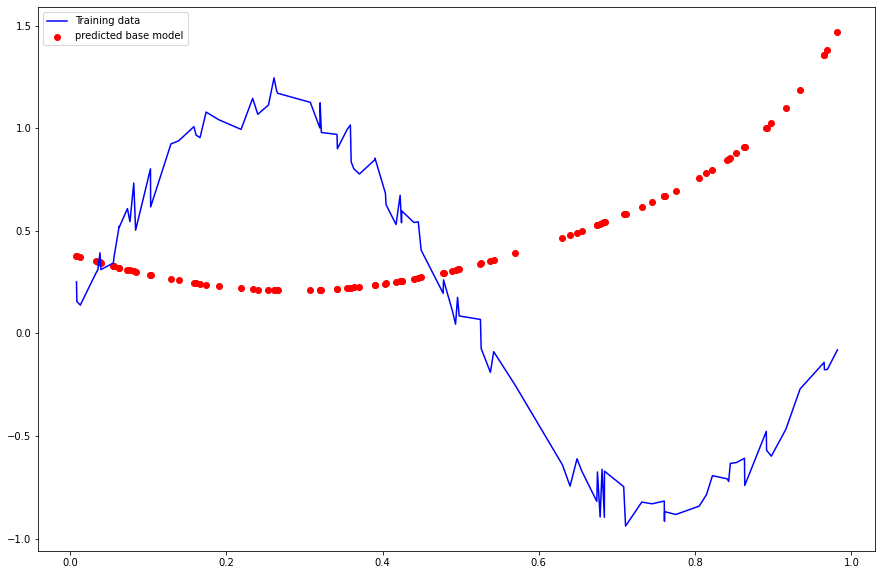

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
axes.plot(sorted_test_data['x'], sorted_test_data['y'], color='blue')
axes.scatter(X_train, y_predicted_m9, color='red')
axes.legend(['Training data', 'predicted base model'])

## E = $\frac{λ}{2}$$w^Tw$ + $\frac{1}{2}$ $\sum_{i=0}^{n}$$(y_i - \bar{y_i})^2$

## where $\bar{y_i}$ = $w_0$ + $w_1$$x_i$ + $w_2$$x_i^2$ + $w_3$$x_i^3$ + $w_4$$x_i^4$ + $w_5$$x_i^5$ + $w_6$$x_i^6$ + $w_7$$x_i^7$ + $w_8$$x_i^8$ + $w_9$$x_i^9$ 

## In this specific case, our partial derivatives for that loss function are the following:

## Partial derivative wrt $w_0$ = $λw_0$ + $(-1)$ $\sum_{i=0}^{n}$ $(y_i - \bar{y_i})$

## Partial derivative wrt $w_1$ = $λw_1$ + $(-1)$ $\sum_{i=0}^{n}$ $x_i$ $(y_i - \bar{y_i})$

## Partial derivative wrt $w_2$ = $λw_2$ + $(-1)$ $\sum_{i=0}^{n}$ $x_i^2$ $(y_i - \bar{y_i})$

## Partial derivative wrt $w_3$ = $λw_3$ + $(-1)$ $\sum_{i=0}^{n}$ $x_i^3$ $(y_i - \bar{y_i})$


.
.
.

## Partial derivative wrt $w_9$ = 2$λw_9$ + $(-1)$ $\sum_{i=0}^{n}$ $x_i^9$ $(y_i - \bar{y_i})$


## If we calculate the value of each derivative, we will obtain the gradient for each coefficient.

##These are the values that give us the slope of the loss function with regards to each specific coefficient.

## They indicate whether we should increase or decrease it to reduce the loss, and also by how much it should be safe to do so.

In [54]:
# MSE for base case
y_vs_y_hat_m9 = pd.DataFrame(data=(y_predicted_m9, Y_train),index=['Y_predicted','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['Y_predicted'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9 = 0
rmse_m9 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9

0.965154360587154

In [56]:
# # Function to calculate the gradient for M = 9
# def calc_2nd_grad(x_dataset, y_dataset, coeff):
  
#   Lambda = 0.1

#   # Partial derivate coefficients
#   y_predicted_m9 = []
#   partial_coeff = [[], [], [], [], [] ,[] ,[] ,[] ,[] ,[]]
#   partial_coeff_w0 = []

#   X = X_train

#   # Find predicted y values
#   for val in X:
#     y_val = 0
#     for deg in range(10):
#       y_val += coeff[deg] * math.pow(val, deg)
#     y_predicted_m9.append(y_val)

#   # Find gradient value after partial derivatives: x^n(y - y_cap) where n = degree of polynomial
#   for x, y, y_bar in zip(X, y_dataset, y_predicted_m9):
#     for deg in range(10):
#       res = (math.pow(x, deg))*(y - y_bar)
#       partial_coeff[deg].append(res)
  
#   new_pd = pd.DataFrame(partial_coeff, index=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']).T
#   gradient = new_pd.sum()
#   gradient = (-1) * gradient
  
#   Lambda_coeff = list(map(lambda w: w*Lambda, coeff))
#   gradient = Lambda_coeff + gradient
#   return gradient

# derivative = calc_2nd_grad(X_train, Y_train, coefficient_m9)
# step_size = 0.3

# new_coeff = coefficient_m9 - (step_size * derivative)
# new_coeff

w0    -8.578298
w1   -12.129881
w2    -8.096005
w3    -7.653448
w4    -6.594671
w5    -7.262697
w6    -5.993759
w7    -5.621030
w8    -2.507273
w9    -2.923550
dtype: float64

In [62]:
# Function to calculate the gradient for M = 9
def calc_2nd_grad(x_dataset, y_dataset, coeff):
  
  Lambda = 0.1

  # Partial derivate coefficients
  y_predicted_m9 = []
  partial_coeff = [[], [], [], [], [] ,[] ,[] ,[] ,[] ,[]]
  partial_coeff_w0 = []

  X = X_train

  A = np.zeros((10, len(x_dataset)))
  lam_I = np.identity(10)*Lambda
  for xi in range (len(x_dataset)):
    for deg in range (10):
      A[xi][deg] += math.pow(x_dataset[xi], deg)
  
  print(A)
  # Find predicted y values
  # for val in X:
  #   y_val = 0
  #   for deg in range(0, 10):
  #     y_val += coeff[deg] * math.pow(val, deg)
  #   y_predicted_m9.append(y_val)

  # # Find gradient value after partial derivatives: x^n(y - y_cap) where n = degree of polynomial
  # for x, y, y_bar in zip(X, y_dataset, y_predicted_m9):
  #   for deg in range(10):
  #     res = (math.pow(x, deg))*(y - y_bar)
  #     partial_coeff[deg].append(res)
  
  # new_pd = pd.DataFrame(partial_coeff, index=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']).T
  # gradient = new_pd.sum()
  # gradient = (-1) * gradient
  
  # Lambda_coeff = list(map(lambda w: w*Lambda, coeff))
  # gradient = Lambda_coeff + gradient
  # return gradient

derivative = calc_2nd_grad(X_train, Y_train, coefficient_m9)
# step_size = 0.3

# new_coeff = coefficient_m9 - (step_size * derivative)
# new_coeff

IndexError: ignored

In [46]:
new_y_predicted_m9 = []
for val in X:
    y_val = 0
    for deg in range(10):
      y_val += new_coeff[deg] * math.pow(val, deg)
    new_y_predicted_m9.append(y_val)


y_vs_y_hat_m9 = pd.DataFrame(data=(new_y_predicted_m9, Y_train),index=['Y_predicted','Y_train']).T
y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['Y_predicted'] - y_vs_y_hat_m9['Y_train'])**2

rmse_m9 = 0
rmse_m9 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
rmse_m9

679.1502473633449

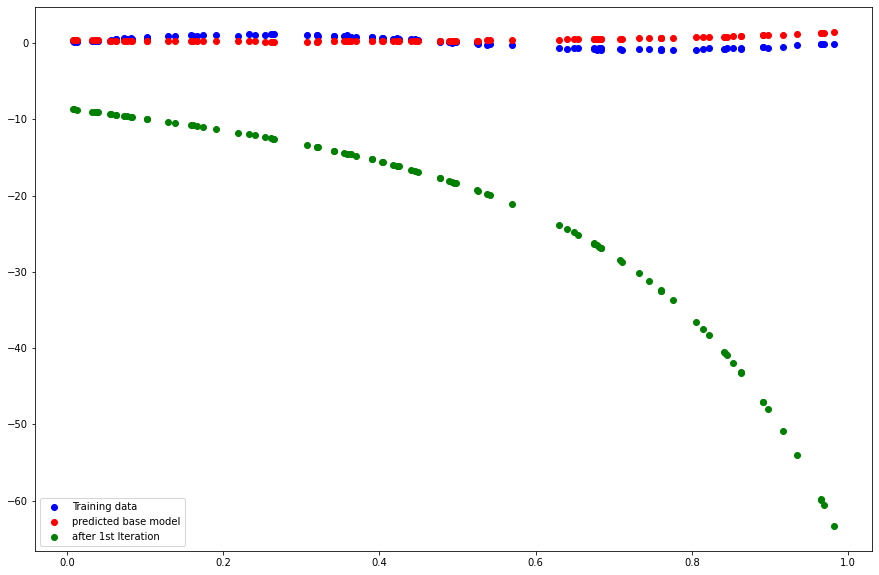

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
axes.scatter(X_train, Y_train, color='blue')
axes.scatter(X_train, y_predicted_m9, color='red')
axes.scatter(X_train, new_y_predicted_m9, color='green')
axes.legend(['Training data', 'predicted base model', 'after 1st Iteration'])

In [43]:
looping_rmse_m9 = 0
looping_y_predicted_m9 = []

# for i in range(500):
while True:
  
  derivative = calc_2nd_grad(X_train, Y_train, new_coeff)
  looping_coeff = new_coeff - (step_size * derivative)

  looping_y_predicted_m9 = []
  for val in X:
      y_val = 0
      for deg in range(0, 10):
        y_val += looping_coeff[deg] * math.pow(val, deg)
      looping_y_predicted_m9.append(y_val)


  y_vs_y_hat_m9 = pd.DataFrame(data=(looping_y_predicted_m9, Y_train),index=['Y_predicted','Y_train']).T
  y_vs_y_hat_m9['sum of square error'] = (y_vs_y_hat_m9['Y_predicted'] - y_vs_y_hat_m9['Y_train'])**2

  looping_rmse_m9 = 0
  looping_rmse_m9 = y_vs_y_hat_m9['sum of square error'].sum() / len(y_vs_y_hat_m9)
  if looping_rmse_m9 < rmse_m9:
    rmse_m9 = looping_rmse_m9
  else:
    break
looping_rmse_m9

1424804.3788966706

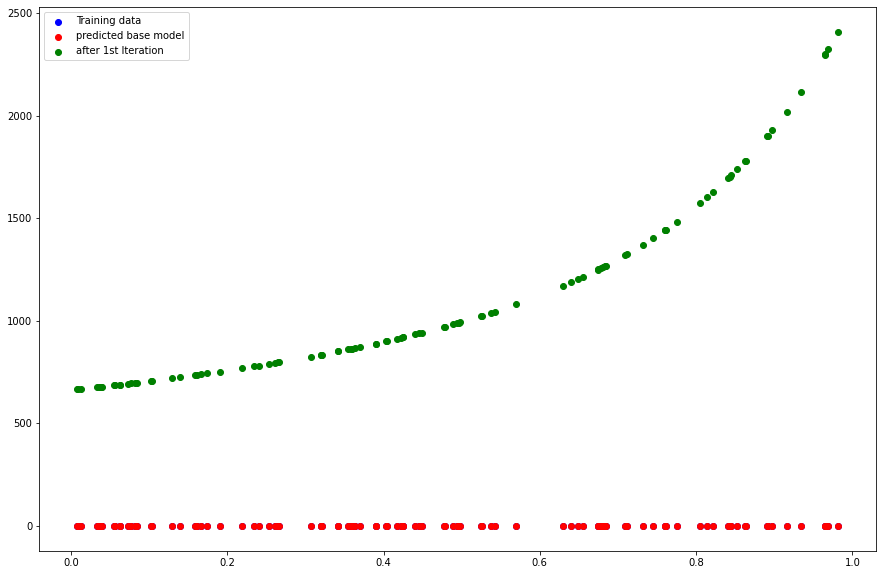

In [44]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
axes.scatter(X_train, Y_train, color='blue')
axes.scatter(X_train, y_predicted_m9, color='red')
axes.scatter(X_train, looping_y_predicted_m9, color='green')
axes.legend(['Training data', 'predicted base model', 'after 1st Iteration'])